# Trabalho Prático
**Disciplina:** Inteligência Artificial (COMP0427)<br>
**Turma:** T01 - 2018.2<br>
**Orientador:** Prof. Dr. Hendrik Teixeira Macedo<br>
**Equipe:** *Ontological Entity*<br>
**Integrantes:** Airton Matheus Cardoso Leite, Eric Rocha Soares, Igor de Figueiredo Rodrigues e Lucas Brabec Barreto Santana

## 1. Descrição do problema

**The Game of Life and Death** é um jogo/desafio de dois jogadores para competições automatizadas virtuais da plataforma *Riddles.io*, o game é baseado, com algumas mudanças elementares para torná-lo competitivo, no popular jogo de simulação (de zero jogadores) conhecido como **Conway's Game of Life**, um autômato celular inventado pelo matemático britânico John Horton Conway em 1970.

<justify>Ambos os jogadores têm uma população de células em uma grade e têm que manipulá-los de tal forma que eles irão sobreviver e prosperar. As células nascerão e morrerão de acordo com algumas regras simples, descritas abaixo. O objetivo é manipular as células de tal forma que as células do seu robô sobrevivam mais do que as do oponente. Quando o robô adversário não tem mais células vivas, você ganha o jogo. Cada célula está em um dos dois estados possíveis, viva ou morta e cada uma interage com suas oito células vizinhas (horizontal, vertical ou diagonalmente adjacentes). Em cada etapa no tempo discreto, as transições ocorrem de acordo com a regras abaixo.</justify>

**Regras:**<br>
• Qualquer célula viva com menos de dois vizinhos vivos morre, como se por subpopulação.<br>
• Qualquer célula viva com dois ou três vizinhos vivos vive para a próxima geração.<br>
• Qualquer célula viva com mais de três vizinhos vivos morre, como se por superpopulação.<br>
• Qualquer célula morta com exatamente três vizinhos vivos torna-se uma célula viva, como se fosse reproduzida.<br>

**Campo:**<br>
O universo padrão do jogo é uma grade de 18x16 células. As bordas do campo não formam uma topologia toroidal bidimensional (isto é, conectadas ao lado oposto do campo). Portanto, as células das esquinas só têm três vizinhos adjacentes e as células das bordas só têm cinco vizinhos adjacentes.

Mais sobre a mecânica do desafio e as regras para competir estão disponíveis na plataforma virtual:<br>
**Game of Life and Death [https://playground.riddles.io/competitions/game-of-life-and-death]**

## 2. Formulação

**Espaço de estados:**<br>

**O estado inicial S[0]** do campo do jogo é gerado de forma semi-aleatória, preenchendo aleatoriamente a metade com uma quantidade igual de células vivas para cada jogador. A outra metade do campo é então criada girando a primeira metade na segunda metade e depois invertendo as cores das células vivas. Assim, o campo inicial é rotacionalmente simétrico e contém exatamente a mesma quantidade de células vivas para cada jogador, que é 50 por padrão.

**Cada estado S[i]** do campo do jogo é uma configuração determinística diretamente induzida a partir da configuração do estado imediatamente anterior **S[i-1]** associado à uma pequena perturbação gerada pela ação de um dos jogadores.

**Ações:**
Os jogadores se revezam em turnos manipulando as células no campo. Após cada movimento, uma única etapa de simulação será executada para criar a próxima geração de células. Existem três ações possíveis:

• **Kill:**
Selecione uma célula viva de qualquer cor no campo e mate-a.<br>
• **Birth:**
Sacrifique duas células vivas de sua própria cor para gerar uma nova célula de sua própria cor.<br>
• **Pass:**
Passe a ação inerte. Fazer nada.

Como é natural para ambientes de conflito entre dois jogadores com interesses opostos *(competição pura)*, o jogo é de soma constante *(soma zero: c=0)*.<br>
**O estado objetivo** é alcançado quando o número de células vivas em campo do jogador adversário chega à zero. Neste caso, por definição, o jogador restante é o vencedor da partida. Caso ambos os jogadores percam todas as suas células vivas ao mesmo tempo, é considerado um empate. Também é possível que o jogo não termine sozinho, então é estipulado um limite de turnos de 100 *rounds* por padrão. Se o limite de rodadas for atingido, o jogo também será tecnicamente empatado.

**Função de transição SxA -> S:**

**Teste objetivo S -> {t,f}:**

**Utilidades (SxP -> R):** SxP = (maxmin ((minmax(SxP)))  (to vendo isso ainda)


## 3. Solução adotada

Como o jogo é determinístico e os estados futuros são determinados por funções de transição fixas regidas pelas regras originais do ***Conway's Game of Life***, descritas na primeira seção, e pelas ações *não-estocásticas* dos jogadores turno a turno, descritas na seção anterior, as ações dos jogadores visam minimizar a expansão do número de células do adversário *(minimizar a perda máxima)* ao passo que buscam maximizar a própria expansão no tabuleiro *(maximizar o ganho mínimo)*. Então, baseado no *Teorema Minimax* de John von Neumann, constata-se que a mecânica do jogo configura um ***Equilíbrio de Nash***. Logo, a abordagem de Inteligência Artificial mais adequada seria uma busca em espaço de estados com adversários, em que a solução seja uma política de funções de transição que determinem as melhores ações possíveis para cada configuração de estado do jogo, utilizando-se a técnica de *Árvore Minimax*, onde a recompensa *(payoff)* de cada jogador é determinada por ambos os valores *minmax* e *maxmin*.

**S -> A**

-- <br>
Aqui você deve descrever a abordagem adotada e explicar com maior detalhes como ela funciona.<br>
A forma como as técnicas de IA se ajustam ao problema devem ser explicadas e justificadas.<br>
Caso dados ou exemplos de partidas anteriores tenham sido utilizados, isso deve ser relatado aqui também.<br>
Esta ́e a secão onde você tem maior chance de mostrar que aprendeu o conteúdo.<br>--

## 4. Implementação

--<br>
Aqui você deve mostrar aspectos de implementação. Eventuais bibliotecas de apoio devem ser citadas e justificadas. Codificação completa pode estar presente e dividida em subseções de modo a facilitar a explicação de cada trecho. Alternativamente, apenas trechos de código mais relevantes podem estar presentes de modo a destacar um ou outro aspecto ou ”sacada”. Tanto em um caso quanto no outro, o código fonte completo deve ser fornecido. Por fim, você deve apontar aqui o resultado da aplicação do seu código final ao serviço https://codequiry.com/, que relata a similaridade entre códigos fonte. O objetivo  ́e mostrar o quanto seu código se assemelha ao(s) disponibilizado(s) pela disciplina. Quanto maior a semelhança, melhor.<br>--


In [1]:
# Stephen Marsland, 2008, 2014
# Adaptação e correção de bugs por Hendrik Macedo, 2017

import numpy as np
import pylab as pl
import time

maxSize = 1000    
#sizes = np.array([109.60,125.48,52.16,195.55,58.67,61.87,92.95,93.14,155.05,110.89,13.34,132.49,194.03,121.29,179.33,139.02,198.78,192.57,81.66,128.90])
sizes = 300*np.random.random_sample(20,)
print(sizes)

[203.96134667 299.15799269  63.29171369 246.37274055   2.62154625
 125.98365682 117.10020809 211.41398657  90.78706865 206.82868921
 292.25133416 214.82377132 216.17418448   0.80241114 252.24199344
  13.76431249  36.14248336  21.87725254 203.88067013 172.67973824]


## 5. Análise e teste

--<br>
Aqui, você deve mostrar o feedback que o ambiente de competição te dará para suas submissões.<br>
Mostrar gráficos de desemepnho comparativo de sua pontuação com a de outros competidores.<br>
Mostrar a evolução de sua pontuação com as versões, mostrar a evolução de performance (tempo de processamento) de seu código com as versões, mostrar screenshots de seu bot agindo em momentos distintos do jogo e/ou link para videos de seu bot são exemplos do que deve conter aqui.<br>--

## 6. Divisão de trabalho e checkpoints

**• Airton:** Estudo do problema, foco nas regras do Game of Life e ações do problema (GoLaD), suporte na escrita do relatório, codificação e testes.<br>
**• Eric:**   Estudo do problema, formulação inicial, estudo do Jupyter NB e do binder, formatação e escrita do relatório, codificação.<br>
**• Igor:**   Estudo do problema, formulação final, adoção de solução inicial, codificação, submissão do bot inicial para testes.<br>
**• Lucas:**  Estudo do problema, criação do repositório inicial, experienciar o game jogando e propor estratégias, codificação.
<br>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -<br>
**12/12/2018:** Definição dos membros da equipe e do problema a ser resolvido.<br>
**13/12/2018:** Primeiras impressões sobre o problema (estudo individual analítico sobre a mecânica e contexto histórico)<br>
**18/12/2018:** Primeiras impressões sobre o problema (estudo individual analítico sobre a mecânica e contexto histórico)<br>
**20/12/2018:** Hangout de debate sobre as implicações filosóficas e impacto científico-matemático do automato celular.<br>
**21/12/2018:** Recesso declarado oficial, todos sumiram.<br>
**07/01/2019:** Volta continua do recesso, os integrantes foram aparecendo aos poucos.<br>
**08/01/2019:** Encontro presencial. Brainstorm. Definição da abordagem e técnica de IA para resolver o problema.<br>
**09/01/2019:** Divisão do trabalho entre os membros da equipe.<br>
**10/01/2019:** Tentativa de formulação do problema usando a abordagem de busca local populacional, com algoritmos genéticos.<br>
**11/01/2019:** Tentativa de formulação do problema usando a abordagem de busca local populacional, com algoritmos genéticos.<br>
**14/01/2019:** Redefinição da abordagem para busca com adversários, através da técnica de Expectiminimax e tentativa de formulação.<br>
**14/01/2019:** Redefinição da abordagem, ainda em busca com adversários, porém através da técnica de Minimax e tentativa de formulação.<br>
**15/01/2019:** Formulação.<br>
**15/01/2019:** Estudo da plataforma Anaconda e Jupyter Notebook (tutoriais e minicursos virtuais).<br>
**15/01/2019:** Inicialização de documentação no Jupyter Notebook do relatório do projeto.<br>
**15/01/2019:** Formatação inicial do documento e descrição do problema de IA escolhido.<br>
**16/01/2019:** Melhor compreensão da API da plataforma riddles.io para o Game of Life and Death e download do starter bot disponibilizado pela mesma.<br>
**16/01/2019:** Teste de submissão do robô burro na plataforma riddles.io para competir com outros robôs.<br>
**16/01/2019:** Instalação do PyCharm IDE e criação do repositório inicial no GitHub para codificação da solução adotada.<br>
**16/01/2019:** Estudo da plataforma Binder para emular o servidor do Jupyter Notebook online (tutoriais).<br>
**16/01/2019:** Escrita do relatório.<br>
**17/01/2019:** Escrita do relatório.<br>
**17/01/2019:** Estudo dos códigos disponibilizados para a disciplina.<br>
**17/01/2019:** Implementação.<br>
**18/01/2019:** Estudo dos códigos disponibilizados para a disciplina.<br>
**18/01/2019:** Implementação.<br>
**19/01/2019:** Estudo dos códigos disponibilizados para a disciplina.<br>
**19/01/2019:** Implementação.<br>
**19/01/2019:** Teste de submissão da solução adotada na plataforma riddles.io para competir com outros robôs.<br>
**20/01/2019:** Estudo dos códigos disponibilizados para a disciplina.<br>
**20/01/2019:** Implementação.<br>
**20/01/2019:** Teste de submissão da solução adotada na plataforma riddles.io para competir com outros robôs.<br>
**20/01/2019:** Implementação e testes finais.<br>

### Avaliação final [RESTRITO AO PROFESSOR]

Critérios de avaliação do trabalho e pontuações:
1. (4pt) Adequabilidade da(s) técnica(s) ao problema (Justificativa);
2. (4pt) Implementação correta da(s) técnica(s) escolhida(s) (Corretude);
3. (2pt) Nível de similaridade com os códigos da disciplina (Reuso);
4. (10pt) Total = 1. + 2. + 3.
5. (+1pt) Extra: maior pontuação da turma (por jogo) (Competição)
6. Xpt = Pontos do integrante obtidos pela média da auto-avaliação da equipe (Participação)
7. Mpt = Média de auto-avaliação da equipe

**NOTA FINAL DO INTEGRANTE:** NF = Total + (Xpt - Mpt)

### Busca exaustiva

In [ ]:
def exhaustive():
    start = time.time()
    best = 0

    twos = np.arange(-len(sizes),0,1)
    twos = 2.0**twos
    for i in range(2**len(sizes)-1):
        string = np.remainder(np.floor(i*twos),2) 
        fitness = np.sum(string*sizes)
        if fitness > best and fitness<maxSize:
            best = fitness
            bestString = string
    finish = time.time()
    print ("Tempo de execução: ",finish-start)
    print ("Maior valor encontrado: ",best)
    print ("Solução correspondente (itens selecionados): ",sizes[bestString>0])
          
exhaustive()

### Greedy

In [ ]:
def greedy():
    start = time.time()
    sizes.sort()
    newSizes = sizes[-1:0:-1]
    space = maxSize
    
    while len(newSizes)>0 and space>newSizes[-1]:
        # Pick largest item that will fit
        item = np.where(space>newSizes)[0][0]
        #print (newSizes[item])
        space = space-newSizes[item]
        newSizes = np.concatenate((newSizes[:item],newSizes[item+1:]))
    finish = time.time()
    print ("Tempo de execução: ",finish-start)
    print ("Maior valor encontrado: = ",maxSize-space)
    
greedy()

### Algoritmos Genéticos

#### Fitness

In [10]:
def fit(pop):

	fitness = np.sum(sizes*pop,axis=1)
	fitness = np.where(fitness>maxSize,maxSize-2*(fitness-maxSize),fitness)
		
	return fitness

#### Algoritmo

In [12]:
class ga:

	def __init__(self,stringLength,nEpochs,populationSize=100,mutationProb=-1,crossover='un',nElite=4,tournament=True):
		""" Constructor"""
		self.stringLength = stringLength
		
		# Population size should be even
		if np.mod(populationSize,2)==0:
			self.populationSize = populationSize
		else:
			self.populationSize = populationSize+1
		
		if mutationProb < 0:
			 self.mutationProb = 1/stringLength
		else:
			 self.mutationProb = mutationProb
			 	  
		self.nEpochs = nEpochs

		self.fitnessFunction = 'fit'

		self.crossover = crossover
		self.nElite = nElite
		self.tournment = tournament

		self.population = np.random.rand(self.populationSize,self.stringLength)
		self.population = np.where(self.population<0.5,0,1)
		
	def runGA(self,plotfig):
		"""The basic loop"""
		pl.ion()
		#plotfig = pl.figure()
		bestfit = np.zeros(self.nEpochs)

		for i in range(self.nEpochs):
			# Compute fitness of the population
			fitness = eval(self.fitnessFunction)(self.population)

			# Pick parents -- can do in order since they are randomised
			newPopulation = self.fps(self.population,fitness)

			# Apply the genetic operators
			if self.crossover == 'sp':
				newPopulation = self.spCrossover(newPopulation)
			elif self.crossover == 'un':
				newPopulation = self.uniformCrossover(newPopulation)
			newPopulation = self.mutate(newPopulation)

			# Apply elitism and tournaments if using
			if self.nElite>0:
				newPopulation = self.elitism(self.population,newPopulation,fitness)
	
			if self.tournament:
				newPopulation = self.tournament(self.population,newPopulation,fitness,self.fitnessFunction)
	
			self.population = newPopulation
			bestfit[i] = fitness.max()

			if (np.mod(i,1)==0):
				print (i, fitness.max())	
			#pl.plot([i],[fitness.max()],'r+')
		pl.plot(bestfit,'kx-')
		#pl.show()
	
	def fps(self,population,fitness):

		# Scale fitness by total fitness
		fitness = fitness/np.sum(fitness)
		fitness = 10*fitness/fitness.max()
		
		# Put repeated copies of each string in according to fitness
		# Deal with strings with very low fitness
		j=0
		while np.round(fitness[j])<1:
			j = j+1
		
		newPopulation = np.kron(np.ones((int(np.round(fitness[j])),1)),population[j,:])

		# Add multiple copies of strings into the newPopulation
		for i in range(j+1,self.populationSize):
			if np.round(fitness[i])>=1:
				newPopulation = np.concatenate((newPopulation,np.kron(np.ones((int(np.round(fitness[i])),1)),population[i,:])),axis=0)

		# Shuffle the order (note that there are still too many)
		indices = list(range(np.shape(newPopulation)[0]))
		np.random.shuffle(indices)
		newPopulation = newPopulation[indices[:self.populationSize],:]
		return newPopulation	

	def spCrossover(self,population):
		# Single point crossover
		newPopulation = np.zeros(np.shape(population))
		crossoverPoint = np.random.randint(0,self.stringLength,self.populationSize)
		for i in range(0,self.populationSize,2):
			newPopulation[i,:crossoverPoint[i]] = population[i,:crossoverPoint[i]]
			newPopulation[i+1,:crossoverPoint[i]] = population[i+1,:crossoverPoint[i]]
			newPopulation[i,crossoverPoint[i]:] = population[i+1,crossoverPoint[i]:]
			newPopulation[i+1,crossoverPoint[i]:] = population[i,crossoverPoint[i]:]
		return newPopulation

	def uniformCrossover(self,population):
		# Uniform crossover
		newPopulation = np.zeros(np.shape(population))
		which = np.random.rand(self.populationSize,self.stringLength)
		which1 = which>=0.5
		for i in range(0,self.populationSize,2):
			newPopulation[i,:] = population[i,:]*which1[i,:] + population[i+1,:]*(1-which1[i,:])
			newPopulation[i+1,:] = population[i,:]*(1-which1[i,:]) + population[i+1,:]*which1[i,:]
		return newPopulation
		
	def mutate(self,population):
		# Mutation
		whereMutate = np.random.rand(np.shape(population)[0],np.shape(population)[1])
		population[np.where(whereMutate < self.mutationProb)] = 1 - population[np.where(whereMutate < self.mutationProb)]
		return population

	def elitism(self,oldPopulation,population,fitness):
		best = np.argsort(fitness)
		best = np.squeeze(oldPopulation[best[-self.nElite:],:])
		indices = list(range(np.shape(population)[0]))
		np.random.shuffle(indices)
		population = population[indices,:]
		population[0:self.nElite,:] = best
		return population

	def tournament(self,oldPopulation,population,fitness,fitnessFunction):
		newFitness = eval(self.fitnessFunction)(population)
		for i in range(0,np.shape(population)[0],2):
			f = np.concatenate((fitness[i:i+2],newFitness[i:i+2]),axis=0)
			indices = np.argsort(f)
			if indices[-1]<2 and indices[-2]<2:
				population[i,:] = oldPopulation[i,:]
				population[i+1,:] = oldPopulation[i+1,:]
			elif indices[-1]<2:
				if indices[0]>=2:
					population[i+indices[0]-2,:] = oldPopulation[i+indices[-1]]
				else:
					population[i+indices[1]-2,:] = oldPopulation[i+indices[-1]]
			elif indices[-2]<2:
				if indices[0]>=2:
					population[i+indices[0]-2,:] = oldPopulation[i+indices[-2]]
				else:
					population[i+indices[1]-2,:] = oldPopulation[i+indices[-2]]
		return population

#### Execução

Tempo de execução:  0.0003879070281982422
0 986.069768885
1 986.069768885
2 994.406328935
3 998.172509874
4 998.702165815
5 998.702165815
6 998.702165815
7 998.702165815
8 998.702165815
9 998.702165815
10 998.702165815
11 998.702165815
12 998.702165815
13 998.702165815
14 998.702165815
15 998.702165815
16 999.607632774
17 999.607632774
18 999.607632774
19 999.607632774
20 999.607632774
21 999.607632774
22 999.607632774
23 999.607632774
24 999.607632774
25 999.607632774
26 999.607632774
27 999.607632774
28 999.607632774
29 999.607632774
30 999.607632774
31 999.607632774
32 999.777949058
33 999.777949058
34 999.777949058
35 999.777949058
36 999.777949058
37 999.777949058
38 999.777949058
39 999.777949058
40 999.777949058
41 999.777949058
42 999.777949058
43 999.777949058
44 999.777949058
45 999.777949058
46 999.777949058
47 999.777949058
48 999.777949058
49 999.777949058
50 999.777949058
51 999.777949058
52 999.777949058
53 999.777949058
54 999.777949058
55 999.777949058
56 999.777949058

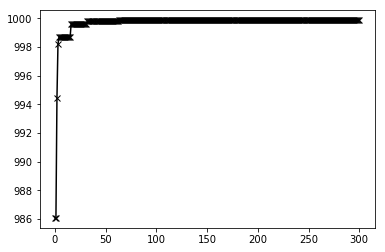

In [13]:
pl.ion()
pl.show()

plotfig = pl.figure()
start = time.time()
ga = ga(20,301,100,-1,'un',4,True)
finish = time.time()
print ("Tempo de execução: ",finish-start)
ga.runGA(plotfig)

pl.pause(0)